In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

In [31]:
sca = StandardScaler()
X_sca = sca.fit_transform(X)

In [64]:
sil_score = silhouette_score(X_sca, df['Cluster'])
print(f"\nSilhouette Score: {sil_score:.4f}")


Silhouette Score: 0.2849


In [78]:
k_range = range(2, 11)  
sil_scores = []

In [80]:
for k_val in k_range:
    kmeans = KMeans(n_clusters=k_val, random_state=42)
    kmeans.fit(X_sca)
    sil_scores.append(silhouette_score(X_sca, kmeans.labels_))

D:\software\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\software\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\software\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\software\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

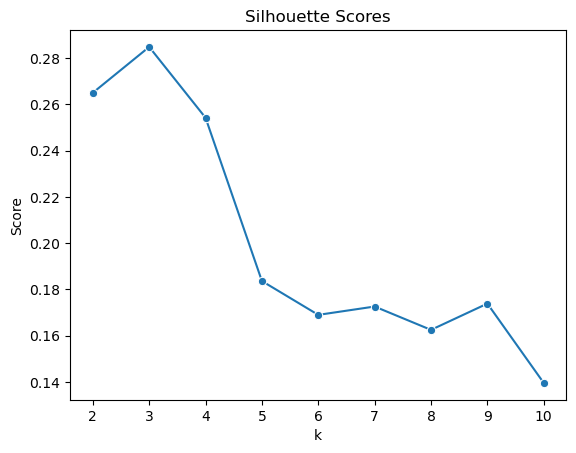

In [84]:
sns.lineplot(x=k_range, y=sil_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('k')
plt.ylabel('Score')
plt.savefig(r'D:\桌面\数据挖掘\silhouette_scores.png')
plt.show()

In [33]:
k = KMeans(n_clusters=3, random_state=42)
df = X.copy()
df['Cluster'] = k.fit_predict(X_sca)

D:\software\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [35]:
print("\nCluster Means:")
print(df.groupby('Cluster').mean())


Cluster Means:
           alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
Cluster                                                                   
0        12.250923    1.897385  2.231231          20.063077   92.738462   
1        13.134118    3.307255  2.417647          21.241176   98.666667   
2        13.676774    1.997903  2.466290          17.462903  107.967742   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
Cluster                                                                     
0             2.247692    2.050000              0.357692         1.624154   
1             1.683922    0.818824              0.451961         1.145882   
2             2.847581    3.003226              0.292097         1.922097   

         color_intensity       hue  od280/od315_of_diluted_wines      proline  
Cluster                                                                        
0               2.973077  1.062708                      2.8033

In [37]:
cen = pd.DataFrame(k.cluster_centers_, columns=wine.feature_names)
print("\nCentroids:")
print(cen)


Centroids:
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0 -0.926072   -0.394042 -0.494517           0.170602  -0.491712   
1  0.164907    0.871547  0.186898           0.524367  -0.075473   
2  0.835232   -0.303810  0.364706          -0.610191   0.577587   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0      -0.075983    0.020813             -0.033534         0.058266   
1      -0.979330   -1.215248              0.726064        -0.779706   
2       0.885237    0.977820             -0.562090         0.580287   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0        -0.901914  0.461804                      0.270764 -0.753846  
1         0.941539 -1.164789                     -1.292412 -0.407088  
2         0.171063  0.473984                      0.779247  1.125185  


In [50]:
sse = k.inertia_
print(f"\nTotal SSE: {sse:.4f}")


Total SSE: 1277.9285


In [52]:
hom = homogeneity_score(y, df['Cluster'])
com = completeness_score(y, df['Cluster'])
v_mea = v_measure_score(y, df['Cluster'])
ari = adjusted_rand_score(y, df['Cluster'])
print("\nClustering Metrics:")
print(f"Homogeneity: {hom:.4f}")
print(f"Completeness: {com:.4f}")
print(f"V-Measure: {v_mea:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")


Clustering Metrics:
Homogeneity: 0.8788
Completeness: 0.8730
V-Measure: 0.8759
Adjusted Rand Index: 0.8975


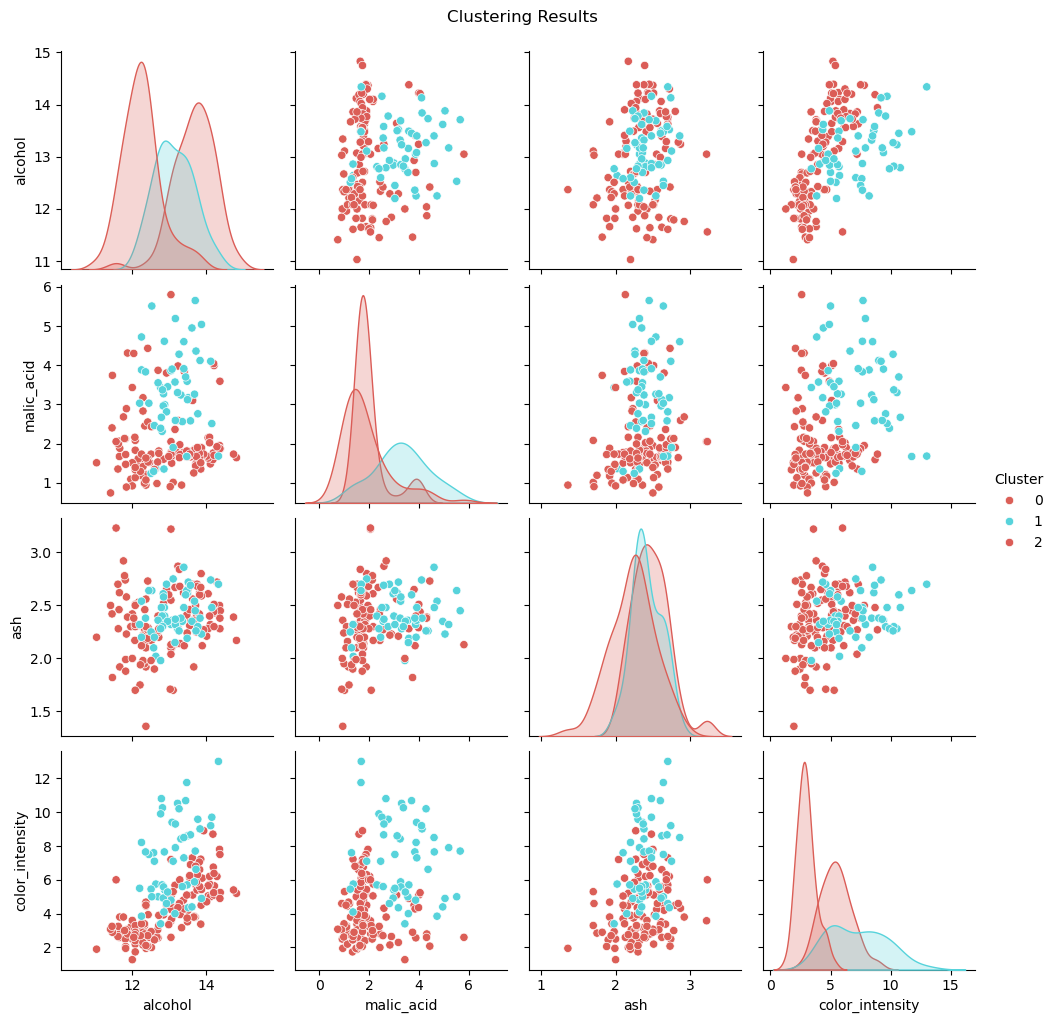

In [54]:
key_f = ['alcohol', 'malic_acid', 'ash', 'color_intensity']
g = sns.pairplot(df, vars=key_f, hue='Cluster', palette='hls')
plt.suptitle('Clustering Results', y=1.02)
plt.savefig(r'D:\桌面\数据挖掘\cluster_pairplot.png')
plt.show()

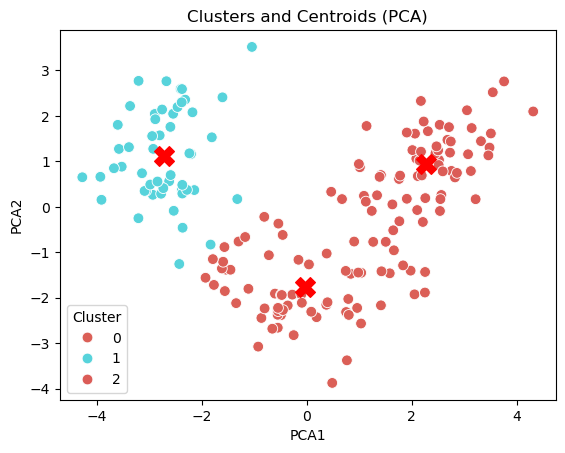

In [60]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sca)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
cen_pca = pca.transform(k.cluster_centers_)

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='hls', s=60)
plt.scatter(cen_pca[:, 0], cen_pca[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('Clusters and Centroids (PCA)')
plt.savefig(r'D:\桌面\数据挖掘\clusters_pca.png')
plt.show()

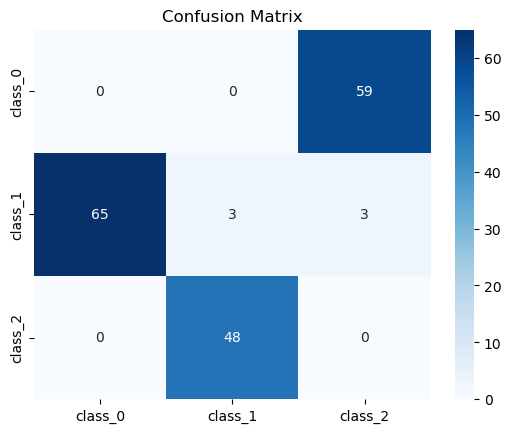

In [62]:
# Visualize confusion matrix
cm = confusion_matrix(y, df['Cluster'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('Confusion Matrix')
plt.savefig(r'D:\桌面\数据挖掘\confusion_matrix.png')
plt.show()
